In [2]:
import pandas as pd
import numpy as np

### Importing data into dataframe

In [449]:
df = pd.read_csv('time_series_19-covid-Confirmed_archived_0325.csv')

### Handling Null Values

In [450]:
df.fillna(0)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,0,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,0,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,0,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,0,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,0,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,0,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,0,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,0,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


### Creating dataframe only for Australia

In [451]:
df_Australia = df.loc[df['Country/Region'] == 'Australia']

In [452]:
df_Australia

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,112,134,171,210,267,307,353,436,533,533.0
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,49,57,71,94,121,121,121,229,296,296.0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,46,61,68,78,94,144,184,221,221,221.0
19,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,19,20,29,29,37,42,50,67,100,100.0
22,From Diamond Princess,Australia,35.4437,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,17,17,28,31,35,52,64,90,120,120.0
61,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,5,6,7,7,10,10,10,16,22,22.0
71,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,1,1,1,1,1,1,3,3,3,3.0
402,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,1,1,2,2,3,4,6,9,19,19.0


### Droping Province/State column

In [453]:
df_Australia = df_Australia.drop(columns=['Province/State'])

### Droping column from Lat, Long upto 2/1/20

In [454]:

df_Australia = df_Australia.drop(df_Australia.iloc[:,1:13], axis = 1) 

### Droping column from 3/24/20 onwards

In [455]:
df_Australia = df_Australia.drop(df_Australia.iloc[:, 53:], axis = 1) 

### Merge all rows into one row

In [456]:
df_Australia = df_Australia.groupby(['Country/Region'], as_index=False).agg('sum')

In [457]:
df_Australia = df_Australia.rename(columns={"Country/Region": "index"})


In [458]:
df_Australia = df_Australia.rename(columns={'2/1/20': 0,
                            '2/2/20': 1,
                            '2/3/20': 2,
                            '2/4/20': 3,
                            '2/5/20': 4,
                            '2/6/20': 5,
                            '2/7/20': 6,
                            '2/8/20': 7,
                            '2/9/20': 8,
                            '2/10/20': 9,
                            '2/11/20': 10,
                            '2/12/20': 11,
                            '2/13/20': 12,
                            '2/14/20': 13,
                            '2/15/20': 14,
                            '2/16/20': 15,
                            '2/17/20': 16,
                            '2/18/20': 17,
                            '2/19/20': 18,
                            '2/20/20': 19,
                            '2/21/20': 20,
                            '2/22/20': 21,
                            '2/23/20': 22,
                            '2/24/20': 23,
                            '2/25/20': 24,
                            '2/26/20': 25,
                            '2/27/20': 26,
                            '2/28/20': 27,
                            '2/29/20': 28,
                            '3/1/20': 29,
                            '3/2/20': 30,
                            '3/3/20': 31,
                            '3/4/20': 32,
                            '3/5/20': 33,
                            '3/6/20': 34,
                            '3/7/20': 35,
                            '3/8/20': 36,
                            '3/9/20': 37,
                            '3/10/20': 38,
                            '3/11/20': 39,
                            '3/12/20': 40,
                            '3/13/20': 41,
                            '3/14/20': 42,
                            '3/15/20': 43,
                            '3/16/20': 44,
                            '3/17/20': 45,
                            '3/18/20': 46,
                            '3/19/20': 47,
                            '3/20/20': 48,
                            '3/21/20': 49,
                            '3/22/20': 50,
                            '3/23/20': 51})


In [459]:
df_Australia

,index,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,51
0,Australia,12,12,12,13,13,14,15,15,15,...,250,297,377,452,568,681,791,1071,1314,1314.0


In [460]:
df_Australia = df_Australia.set_index('index').transpose()

In [469]:
df_Australia = df_Australia.rename(columns={"Australia": "confirmed_cases"})
no_of_days=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]  
df_Australia['no_of_days'] = no_of_days
df_Australia

index,confirmed_cases,no_of_days
0,12.0,0
1,12.0,1
2,12.0,2
3,13.0,3
4,13.0,4
5,14.0,5
6,15.0,6
7,15.0,7
8,15.0,8
9,15.0,9


In [471]:
df_days = df_Australia.drop(['confirmed_cases'], axis=1)
df_cases = df_Australia[['confirmed_cases']]
print(df_days.shape)
print(df_cases.shape)

(52, 1)
(52, 1)


## Implementing Linear Regression

In [472]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(df_days, df_cases, test_size=0.035, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(50, 1) (50, 1)
(2, 1) (2, 1)


In [473]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [474]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [475]:
pred = model.predict(xtest)
print(pred)

[[325.15282616]
 [478.36966424]]


In [476]:
model.coef_

array([[13.92880346]])

In [477]:
model.intercept_

array([-190.21290192])

In [478]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)

In [479]:
train_r2=r2_score(ytrain,model.predict(xtrain))

In [480]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )

R2 score for testing: 0.37728460066597913
R2 score for training: 0.44764074482102945


In [481]:
!pip install yellowbrick

/Users/faizan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


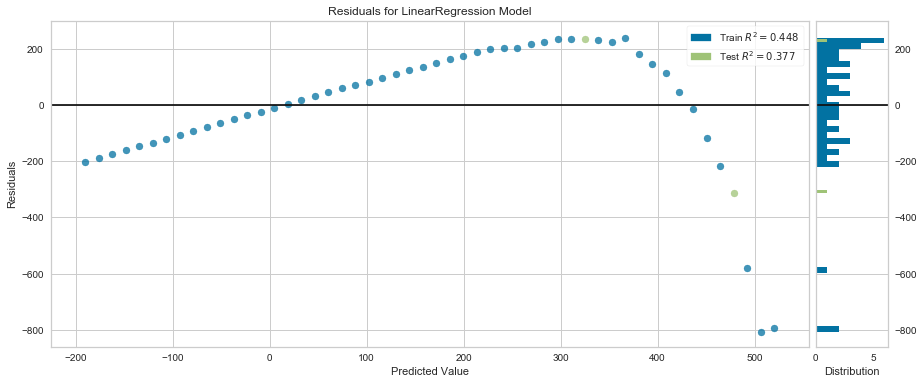

In [482]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(model,hist=True)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()    